### 1. Pandas介绍
    panel + data + analysis,2008年WesMcKinney开发的库，专门用于数据挖掘的开源python库。以Numpy为基础，借力Numpy模块在计算方面性能高的优势，给予matplotlib能够简便的画图，具有独特的数据结构。
#### 1.1 DataFrame
    结构：具有行索引，又有列索引的二维数组, 行索引index, 列索引columns
    属性：shape
         index
         columns
         values
         T
    方法：head() 默认返回前5行
         tail() 默认返回后5行
    索引设置：
        修改行列索引值（只能整体修改）
        重设索引： reset_index(drop=False) drop默认为False,不删除原来索引，如果为True，删除原来索引值
        设置新索引：set_index(key, drop=True),keys:列索引名称或者索引名称的列表。drop:默认为True,删除原来的列。

In [3]:
import numpy as np
# 创建一个正太分布的10个股票5天涨跌幅数据
stock_change =np.random.normal(0,1,(10,5))

stock_change

array([[ 0.81350389, -0.31394287, -0.38668043,  0.02336036,  0.26301673],
       [ 0.26147489,  0.56225391, -1.10996024, -0.94336843, -0.72726636],
       [ 1.00133795, -0.50842201, -1.21159764, -0.02548124, -0.1716573 ],
       [-0.34804181, -0.07729982, -0.51769215,  2.56746585, -1.0131904 ],
       [-1.79648505,  0.7651048 ,  0.59889304, -0.60109954, -1.18591041],
       [-0.85854215,  1.0683935 , -1.17020305, -0.47370846, -0.41347493],
       [ 1.52336275,  0.55743784,  0.44776286,  0.46125433, -2.02126455],
       [-0.40937027,  1.0363784 ,  0.25845694, -1.19852285, -1.12044888],
       [ 1.07931542, -0.27644646, -0.46727967, -0.08174324,  0.56452423],
       [-1.85384964,  0.02398996,  0.8692557 ,  0.17975211, -0.81969234]])

In [4]:
import pandas as pd
pd.DataFrame(stock_change)


,0,1,2,3,4
0,0.813504,-0.313943,-0.386680,0.023360,0.263017
1,0.261475,0.562254,-1.109960,-0.943368,-0.727266
2,1.001338,-0.508422,-1.211598,-0.025481,-0.171657
3,-0.348042,-0.077300,-0.517692,2.567466,-1.013190
4,-1.796485,0.765105,0.598893,-0.601100,-1.185910
5,-0.858542,1.068393,-1.170203,-0.473708,-0.413475
6,1.523363,0.557438,0.447763,0.461254,-2.021265
7,-0.409370,1.036378,0.258457,-1.198523,-1.120449
8,1.079315,-0.276446,-0.467280,-0.081743,0.564524
9,-1.853850,0.023990,0.869256,0.179752,-0.819692


In [8]:
# 添加行索引
stock = ["股票{}".format(i) for i in range(10)]
#添加列索引
data = pd.date_range(start="20200601", periods = 5, freq= "B")

data

pd.DataFrame(stock_change, index = stock, columns = data)

,2020-06-01 00:00:00,2020-06-02 00:00:00,2020-06-03 00:00:00,2020-06-04 00:00:00,2020-06-05 00:00:00
股票0,0.813504,-0.313943,-0.386680,0.023360,0.263017
股票1,0.261475,0.562254,-1.109960,-0.943368,-0.727266
股票2,1.001338,-0.508422,-1.211598,-0.025481,-0.171657
股票3,-0.348042,-0.077300,-0.517692,2.567466,-1.013190
股票4,-1.796485,0.765105,0.598893,-0.601100,-1.185910
股票5,-0.858542,1.068393,-1.170203,-0.473708,-0.413475
股票6,1.523363,0.557438,0.447763,0.461254,-2.021265
股票7,-0.409370,1.036378,0.258457,-1.198523,-1.120449
股票8,1.079315,-0.276446,-0.467280,-0.081743,0.564524
股票9,-1.853850,0.023990,0.869256,0.179752,-0.819692


#### 1.2 MutiIndex与Panel
   * 1.MultiIndex: （index）
       属性：names:levels的名称
            levels:每个level的元组值
   * 2. Panel(未来版本可能会被弃用)
       class pandas.Panel(data=None,items=None,major_axis=None,minor_axis=None,copy=False, dtype=None)
       存储3维数组的Panel结构


In [26]:
p = pd.Panel(np.arange(24).reshape(4,3,2), 
             items = list('ABCD'),
             major_axis=pd.date_range('20200601',periods=3),
             minor_axis=['first','second'])

print(p)
print("--------")
print(p["A"])
print("--------")
print(p["D"])
print("--------")
print(p.major_xs("2020-06-01"))
print("--------")
print(p.minor_xs("first"))

p.to_frame()

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 3 (major_axis) x 2 (minor_axis)
Items axis: A to D
Major_axis axis: 2020-06-01 00:00:00 to 2020-06-03 00:00:00
Minor_axis axis: first to second
--------
            first  second
2020-06-01      0       1
2020-06-02      2       3
2020-06-03      4       5
--------
            first  second
2020-06-01     18      19
2020-06-02     20      21
2020-06-03     22      23
--------
        A  B   C   D
first   0  6  12  18
second  1  7  13  19
--------
            A   B   C   D
2020-06-01  0   6  12  18
2020-06-02  2   8  14  20
2020-06-03  4  10  16  22


/home/Irenicus/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


A   B   C   D
major      minor                
2020-06-01 first   0   6  12  18
           second  1   7  13  19
2020-06-02 first   2   8  14  20
           second  3   9  15  21
2020-06-03 first   4  10  16  22
           second  5  11  17  23

#### 1.3 Series
    带索引的一维度数组
    属性：
        index
        values
   * 创建 Series
       pd.Series(np.arange(x), index[xxxx])

In [35]:
#sr = data.i[1,:]
pd.Series(np.arange(3,9,2), index=["a","b","c"])

a    3
b    5
c    7
dtype: int64

### 2.基本数据操作
  #### 2.1 索引操作
     * 直接使用行列索引（先列后行）
     * 按名字索引 loc
     * 按数字索引 iloc
     * 组合索引 (数字+名字)ix
  #### 2.2 赋值操作
  #### 2.3 排序操作  
   * 按内容排序 df.sort_values(by=, ascending =)  ascending=False 降序，ascending=True 升序
   * 按索引排序

In [135]:
import pandas as pd
df = pd.read_excel("Data/stocks_data.xlsx")
data = df.head()
data2 = data.drop(["最新股价","今日涨幅"],axis=1)
print(data)
print(data2)
# 直接索引
print(data["股票名称"][2])
# 按名字索引
print(data.loc[2,"股票名称"])
print(data.loc[2]["股票名称"])
# 按数字索引
print(data.iloc[2][1])
# 组合索引
print(data.ix[:4,["股票代码","股票名称","最新股价"]])

# 赋值操作
data["股票代码"] = 100
print(data)

# 按内容排序操作
print(df.sort_values(by="最新股价", ascending = True)) ##可以按多列进行排序

# 按索引排序操作
print(df.sort_index(ascending=False).head())

     股票代码  股票名称   最新股价    今日涨幅
0     725  京东方Ａ   4.74  0.0922
1  600887  伊利股份  30.28  0.0632
2     651  格力电器  62.39  0.0369
3  601318  中国平安  76.72  0.0189
4  601899  紫金矿业   4.01  0.0497
     股票代码  股票名称
0     725  京东方Ａ
1  600887  伊利股份
2     651  格力电器
3  601318  中国平安
4  601899  紫金矿业
格力电器
格力电器
格力电器
格力电器
     股票代码  股票名称   最新股价
0     725  京东方Ａ   4.74
1  600887  伊利股份  30.28
2     651  格力电器  62.39
3  601318  中国平安  76.72
4  601899  紫金矿业   4.01
   股票代码  股票名称   最新股价    今日涨幅
0   100  京东方Ａ   4.74  0.0922
1   100  伊利股份  30.28  0.0632
2   100  格力电器  62.39  0.0369
3   100  中国平安  76.72  0.0189
4   100  紫金矿业   4.01  0.0497
     股票代码  股票名称   最新股价    今日涨幅
4     100  紫金矿业   4.01  0.0497
0     100  京东方Ａ   4.74  0.0922
8  601816  京沪高铁   6.66  0.0374
9  600812  华北制药  10.75  0.1003
7  600438  通威股份  14.78  0.0587
5    2236  大华股份  17.57  0.0427
1     100  伊利股份  30.28  0.0632
6  601601  中国太保  30.37  0.0379
2     100  格力电器  62.39  0.0369
3     100  中国平安  76.72  0.0189
     股票代码  股票名称   最新股价    今日涨幅
9  600812  华北制

/home/Irenicus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/home/Irenicus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### 2.4 算数运算 (+,-*,/ ,add(), sub()...)
#### 2.5 逻辑运算  (>, <, & , | , query(expr), isin(values)  )
#### 2.6 统计运算
   * 统计函数  min, max, mean, midian, count, std, var, prod, idmax, idmin, mode, describe()
   * 累计统计函数 cummax() cumsum() cummin() cumprod()
#### 2.7 自定义运算
   * apply(func,axis=0) func:自定义函数， axis:默认0为列，1为行

0    False
1     True
2    False
3    False
4    False
dtype: bool
   股票代码  股票名称   最新股价    今日涨幅
1   100  伊利股份  30.28  0.0632
   股票代码  股票名称  最新股价    今日涨幅
0   100  京东方Ａ  4.74  0.0922
4   100  紫金矿业  4.01  0.0497
        股票代码       最新股价      今日涨幅
count    5.0   5.000000  5.000000
mean   100.0  35.628000  0.052180
std      0.0  33.117687  0.027705
min    100.0   4.010000  0.018900
25%    100.0   4.740000  0.036900
50%    100.0  30.280000  0.049700
75%    100.0  62.390000  0.063200
max    100.0  76.720000  0.092200
0    0.0922
1    0.1554
2    0.1923
3    0.2112
4    0.2609
Name: 今日涨幅, dtype: float64
   股票代码   最新股价    今日涨幅
0   100   4.74  0.0922
1   100  30.28  0.0632
2   100  62.39  0.0369
3   100  76.72  0.0189
4   100   4.01  0.0497


股票代码     0.0000
最新股价    72.7100
今日涨幅     0.0733
dtype: float64

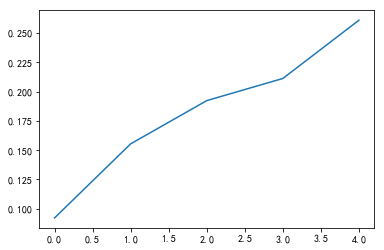

In [139]:
# 算数运算
data["股票代码"].sub(3)
data
# 逻辑运算
sr = data["最新股价"] 
sr1 = data["今日涨幅"] 
print((sr > 10) & (sr1> 0.05))
print(data.query("最新股价 > 10 & 今日涨幅 >0.05"))
print(data[data["最新股价"].isin([4.01, 4.74])])

#统计运算
print(data.describe())
print(data["今日涨幅"].cumsum())
# 画图
data["今日涨幅"].cumsum().plot()

# 自定义运算，定义计算最大值-最小值运算
data4 = data.drop(["股票名称"],axis=1)
print(data4)
data4.apply(lambda x : x.max()-x.min(),axis=0)

#### 2.8 pandas画图
  * DataFrame.plot(x=None,y=None,kind="line")
  * kind
      - line
      - bar
      - barh
      - hist
      - pie
      - scatter

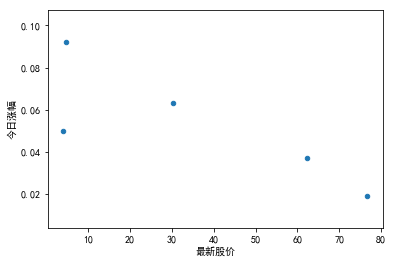

In [141]:
data4.plot(x = "最新股价", y= "今日涨幅", kind="scatter")

### 3. 文件读取与存储
 #### 3.1 CSV
     read_csv(path, usecols, names)
     to_csv(path, columns, mode, index, header)
 #### 3.2 HDF5 (最快，压缩高，跨平台，支持多维数据，推荐使用)
     read_hdf(path_or_buffer, key, mode, return)
     to_hdf(path_or_buffer, key, )
 #### 3.3 JSON
     read_json(path, orient="records", line=True)
     to_json(path, orient="records", line=True)